In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
columns = ['PRB_UTILIZATION', 'RRC_USER', 'PAYLOAD', 'LTE_DL_USER_THROUGHPUT_kbps']
df = pd.read_csv("data.csv", usecols=columns, encoding='latin-1')
df.head()

,PRB_UTILIZATION,RRC_USER,PAYLOAD,LTE_DL_USER_THROUGHPUT_kbps
0,0.788342,40.56900,5578.5300,6851.178
1,0.996347,189.60725,12526.7775,2727.430
2,0.866482,56.71725,6454.2875,5754.734
3,0.575340,49.06525,6588.3050,16473.076
4,0.989565,160.48700,7454.7550,2005.030


In [4]:
df = df.dropna()
q1 = df["LTE_DL_USER_THROUGHPUT_kbps"].quantile(0.25)
q3 = df["LTE_DL_USER_THROUGHPUT_kbps"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df["LTE_DL_USER_THROUGHPUT_kbps"] >= lower_bound) & (df["LTE_DL_USER_THROUGHPUT_kbps"] <= upper_bound)]
df

,PRB_UTILIZATION,RRC_USER,PAYLOAD,LTE_DL_USER_THROUGHPUT_kbps
0,0.788342,40.56900,5578.5300,6851.178
1,0.996347,189.60725,12526.7775,2727.430
2,0.866482,56.71725,6454.2875,5754.734
3,0.575340,49.06525,6588.3050,16473.076
4,0.989565,160.48700,7454.7550,2005.030
...,...,...,...,...
89995,0.985400,273.57575,11129.7925,2207.350
89996,0.982738,183.75800,14468.6875,4124.812
89997,0.159270,3.45125,4400.9500,28423.114
89998,0.261028,3.41500,1827.2600,15221.762


<ipython-input-5-86b09ca43b22>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


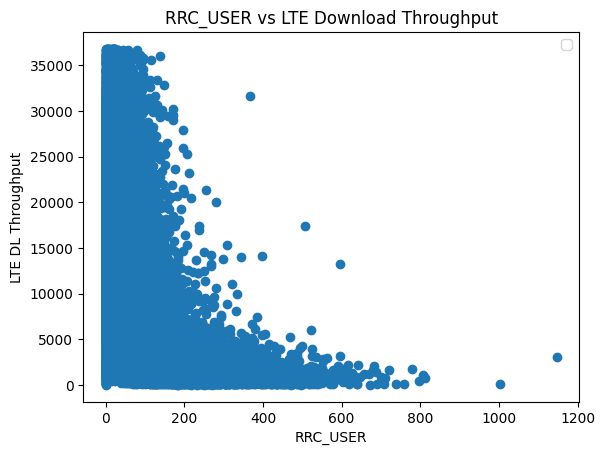

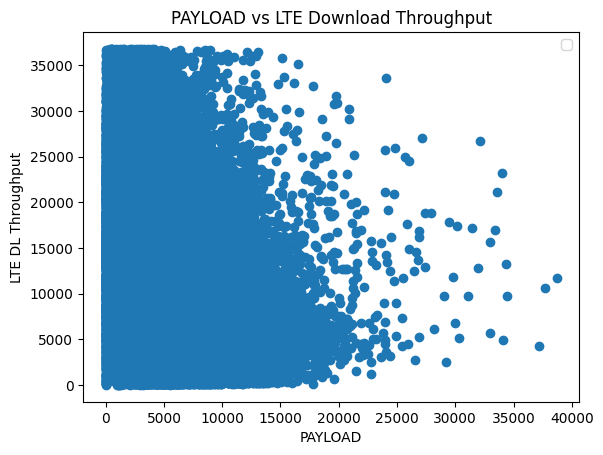

In [5]:
for label in df.columns[1:]:
  if label == 'LTE_DL_USER_THROUGHPUT_kbps': continue
  plt.scatter(df[label], df['LTE_DL_USER_THROUGHPUT_kbps'])
  plt.title(f"{label} vs LTE Download Throughput")
  plt.ylabel("LTE DL Throughput")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [6]:
X = df.drop('LTE_DL_USER_THROUGHPUT_kbps', axis=1)
y = df['LTE_DL_USER_THROUGHPUT_kbps']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = lin_reg.predict(X_test)

In [10]:
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
mse

20439410.61410957

In [11]:
r2 = r2_score(y_pred=y_pred, y_true=y_test)
r2

0.7114284215305056

In [12]:
import joblib
joblib.dump(lin_reg, "model.joblib")

['model.joblib']

# Using Neural Networks

In [13]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [14]:
history = nn_model.fit(
    X_train, y_train, verbose=1, epochs=100, validation_data=(X_test, y_test)
)

Epoch 1/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 144931120.0000 - val_loss: 137560240.0000
Epoch 2/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 137148192.0000 - val_loss: 133147536.0000
Epoch 3/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 132195472.0000 - val_loss: 129279592.0000
Epoch 4/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 129004728.0000 - val_loss: 127089016.0000
Epoch 5/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 126306032.0000 - val_loss: 125236560.0000
Epoch 6/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 126125584.0000 - val_loss: 123510208.0000
Epoch 7/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 123103176.0000 - val_loss: 122046048.0000
Epoch 8/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 121738544.0000 - val_loss: 121745520.0000
Epoch 9/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 120315304.0000 - val_loss: 118255568.0000
Epoch 10/100
2174/2174 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

In [15]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

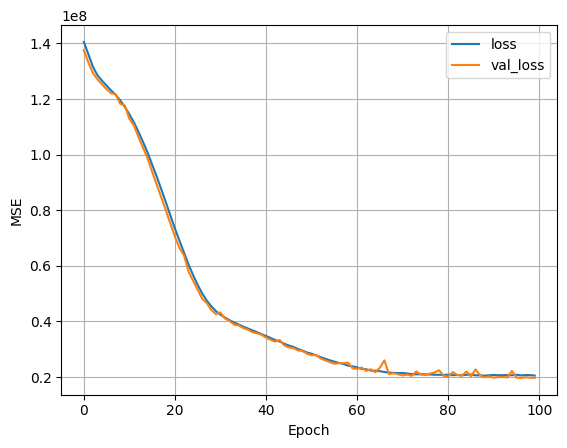

In [16]:
plot_loss(history)

In [18]:
y_train.shape

(69563,)

In [19]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [20]:
MSE(y_pred, y_test)

20439410.61410957

In [23]:
y_pred_nn = nn_model.predict(X_test)

544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [24]:
r2 = r2_score(y_pred=y_pred_nn, y_true=y_test)
r2

0.7214159189329871